<a href="https://colab.research.google.com/github/mehrab-karim-antor/Machine_Learning/blob/main/AI_ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# ==== Chunk 1: Setup & Load Dataset ====
# English: Import libraries and load dataset


import pandas as pd
import numpy as np

# Load dataset (make sure dataset.csv is uploaded in Colab working directory)
df = pd.read_csv("/StudentPerformance.csv")

# Show shape and first few rows
print("Shape:", df.shape)
df.head()

Shape: (10, 4)


,Hours_Studied,Hours_Slept,Prior_Grade,Result
0,2.0,7.0,70,fail
1,3.5,6.0,65,fail
2,5.0,8.0,80,pass
3,1.0,5.0,50,fail
4,4.0,6.5,78,pass


In [35]:
# ==== Chunk 2: Data Exploration ====
# English: Explore dataset


print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

print("\nClass distribution (Result):")
print(df['Result'].value_counts())

print("\nBasic statistics:")
print(df[['Hours_Studied','Hours_Slept','Prior_Grade']].describe())

Columns: ['Hours_Studied', 'Hours_Slept', 'Prior_Grade', 'Result']

Data types:
 Hours_Studied    float64
Hours_Slept      float64
Prior_Grade        int64
Result            object
dtype: object

Class distribution (Result):
Result
fail    5
pass    5
Name: count, dtype: int64

Basic statistics:
       Hours_Studied  Hours_Slept  Prior_Grade
count      10.000000    10.000000    10.000000
mean        3.300000     6.650000    70.000000
std         1.602082     1.179689    12.055428
min         1.000000     5.000000    50.000000
25%         2.125000     6.000000    61.250000
50%         3.250000     6.750000    72.500000
75%         4.375000     7.375000    79.500000
max         6.000000     8.500000    85.000000


In [37]:
# ==== Chunk 3: Preprocessing ====
# English: Handle missing values, encode labels, scale features


from sklearn.preprocessing import LabelEncoder, StandardScaler

# Missing values check
print("Missing values:\n", df.isnull().sum())

# Features and target
X = df[['Hours_Studied','Hours_Slept','Prior_Grade']].values
y_text = df['Result'].values

# Encode target
le = LabelEncoder()
y = le.fit_transform(y_text)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature mean:", X_scaled.mean(axis=0))
print("Scaled feature std:", X_scaled.std(axis=0))

Missing values:
 Hours_Studied    0
Hours_Slept      0
Prior_Grade      0
Result           0
dtype: int64
Label mapping: {'fail': np.int64(0), 'pass': np.int64(1)}
Scaled feature mean: [ 1.33226763e-16 -2.99760217e-16 -2.22044605e-17]
Scaled feature std: [1. 1. 1.]


In [42]:
 # ==== Chunk 4: Train/Test Split ====
# English: Split dataset into train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])





Train size: 8 Test size: 2


In [25]:
# ==== Chunk 5: Model Training ====
# English: Train KNN model with k=3


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train, y_train)

print("Model trained with k=3")

Model trained with k=3


In [26]:
# ==== Chunk 6: Evaluation ====
# English: Evaluate model performance


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

        fail       1.00      1.00      1.00         1
        pass       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



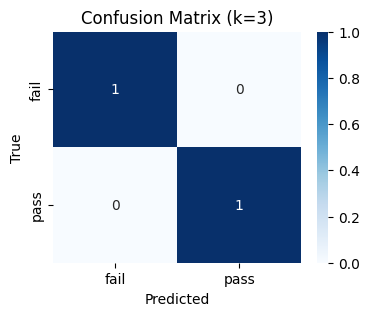

In [27]:
# ==== Chunk 7: Confusion Matrix Visualization ====
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (k=3)')
plt.show()

In [28]:
# ==== Chunk 8: Hyperparameter Tuning ====
results = []
for k in range(1, X_train.shape[0] + 1):
    for metric_name, p_val in [('euclidean', 2), ('manhattan', 1)]:
        knn_tmp = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p_val)
        knn_tmp.fit(X_train, y_train)
        y_pred_tmp = knn_tmp.predict(X_test)
        acc_tmp = accuracy_score(y_test, y_pred_tmp)
        f1_tmp = f1_score(y_test, y_pred_tmp, zero_division=0)
        results.append((k, metric_name, acc_tmp, f1_tmp))

results_sorted = sorted(results, key=lambda x: (x[2], x[3]), reverse=True)
print("Best setting:", results_sorted[0])

Best setting: (1, 'euclidean', 1.0, 1.0)


In [40]:
# ==== Chunk 9: Predict New Student ====
# English: Predict new student's result based on user input
hours_studied_input = float(input("Enter Hours_Studied: "))
hours_slept_input = float(input("Enter Hours_Slept: "))
prior_grade_input = float(input("Enter Prior_Grade: "))

new_student = np.array([[hours_studied_input, hours_slept_input, prior_grade_input]])
new_student_scaled = scaler.transform(new_student)

pred = knn.predict(new_student_scaled)
print(f"Prediction for [{hours_studied_input}, {hours_slept_input}, {prior_grade_input}]: {le.inverse_transform(pred)[0]}")


Enter Hours_Studied: 5
Enter Hours_Slept: 6
Enter Prior_Grade: 88
Prediction for [5.0, 6.0, 88.0]: pass
